In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Engineering

## Fill Na

In [3]:
def fill_na(df):
    df.Alley.fillna('No Alley',inplace=True)
    df.LotFrontage.fillna(0,inplace=True)
    df.BsmtQual.fillna('No Basement',inplace=True)
    df.BsmtCond.fillna('No Basement',inplace=True)
    df.BsmtExposure.fillna('No Basement',inplace=True)

    df.BsmtFinSF1[df.BsmtFinType1.isnull()] = 0
    df.BsmtFinSF2[df.BsmtFinType2.isnull()] = 0

    df.BsmtFinType1.fillna('No Basement',inplace=True)
    df.BsmtFinType2.fillna('No Basement',inplace=True)
    df.FireplaceQu.fillna('No Fireplace',inplace=True)
    df.GarageType.fillna('No Garage',inplace=True)
    df.GarageYrBlt.fillna('No Garage',inplace=True)
    df.GarageFinish.fillna('No Garage',inplace=True)
    df.GarageQual.fillna('No Garage',inplace=True)
    df.GarageCond.fillna('No Garage',inplace=True)
    df.PoolQC.fillna('No Pool',inplace=True)
    df.Fence.fillna('No Fence',inplace=True)
    df.MiscFeature.fillna('No Misc',inplace=True)

    df.drop('Utilities',inplace=True,axis=1)

    df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)
    df.MasVnrArea.fillna(df.MasVnrArea.mode()[0],inplace=True)
    df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)
fill_na(df)

C:\Users\Hanyu Zou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hanyu Zou\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
def test(x):
    print(x.value_counts())
    print(x.isnull().sum()/len(df))

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No Misc,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,No Misc,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0

## New Features

In [6]:
df['Month_sold'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YrSold,x.MoSold,1)).days/30),axis=1)
df.drop(['YrSold','MoSold'],axis=1, inplace=True)
df['House_Duration'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YearBuilt,1,1)).days/360),axis=1)
df.drop('YearBuilt',axis=1, inplace=True)
df['Replenish_Duration'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YearRemodAdd,1,1)).days/360),axis=1)
df.drop('YearRemodAdd',axis=1, inplace=True)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
def get_finished_bsmt_pct(x):
    try:
        return (x.BsmtFinSF1+x.BsmtFinSF2)/x.TotalBsmtSF
    except:
        return 0
df['BsmtFin_pct'] = df.apply(lambda x:get_finished_bsmt_pct(x),axis=1)

def get_average_car_area(x):
    try:
        return x.GarageArea/x.GarageCars
    except:
        return 0
df['Car_Area_Average'] = df.apply(lambda x: get_average_car_area(x),axis=1)



## Transforming

In [7]:
df.drop('Id',axis=1,inplace=True)
df.MSSubClass = df.MSSubClass.apply(lambda x: str(x))
df.OverallCond = df.OverallCond.apply(lambda x: str(x))
df.OverallQual = df.OverallQual.apply(lambda x: str(x))
# df.MoSold = df.MoSold.apply(lambda x: str(x))
# df.YrSold = df.YrSold.apply(lambda x: str(x))

## Dummy Variables & Drop

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Month_sold,House_Duration,Replenish_Duration,TotalSF,BsmtFin_pct,Car_Area_Average
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,208500,145,17,17,2566,0.824766,274.000000
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,181500,154,45,45,2524,0.774960,230.000000
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,223500,138,19,18,2706,0.528261,304.000000
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Misc,0,WD,Abnorml,140000,169,107,51,2473,0.285714,214.000000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,250000,135,20,20,3343,0.572052,278.666667


In [10]:
categorical_variables = list(df.columns[0:2])+list(df.columns[4:list(df.columns).index('MasVnrType')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('ExterQual'):list(df.columns).index('BsmtFinType1')+1])+['BsmtFinType2']
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('Heating'):list(df.columns).index('Electrical')+1])+['KitchenQual']+['Functional']
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('FireplaceQu'):list(df.columns).index('GarageFinish')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('GarageQual'):list(df.columns).index('PavedDrive')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('PoolQC'):list(df.columns).index('MiscFeature')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('SaleType'):list(df.columns).index('SaleCondition')+1])

### 1. LabelEncoder

In [11]:
# for c in categorical_variables:
#     lbl = LabelEncoder()
#     lbl.fit(list(df[c].values))
#     df[c] = lbl.transform(list(df[c].values))

In [12]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Month_sold,House_Duration,Replenish_Duration,TotalSF,BsmtFin_pct,Car_Area_Average
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,208500,145,17,17,2566,0.824766,274.000000
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,181500,154,45,45,2524,0.774960,230.000000
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,223500,138,19,18,2706,0.528261,304.000000
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Misc,0,WD,Abnorml,140000,169,107,51,2473,0.285714,214.000000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,250000,135,20,20,3343,0.572052,278.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No Misc,0,WD,Normal,175000,151,21,20,2600,0.000000,230.000000
1456,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,No Misc,0,WD,Normal,210000,121,43,32,3615,0.618029,250.000000
1457,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,Shed,2500,WD,Normal,266500,118,8

### 2. Get Dummies

In [13]:
for i in categorical_variables:
    df = df.join(pd.get_dummies(df[i],prefix=i))
    df.drop(i,inplace=True,axis=1)

## Scaling 

In [14]:
Y = np.log1p(df.SalePrice)
df.drop('SalePrice',axis=1,inplace=True)
X = df

In [15]:
for i in [i for i in X.columns if '_' not in i]:
    try:
        X[i] = X[i].apply(lambda x: (x-X[i].mean())/X[i].std())
    except:
        print(i)

# Modeling

In [16]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error  as mse
from sklearn.base import clone

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
kfolds = KFold(n_splits=5)

## Lasso

In [19]:
Lasso_parameters= {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
lasso_best = GridSearchCV(Lasso(random_state=1),Lasso_parameters,cv=kfolds,verbose=True)
lasso_best.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=1,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [20]:
lasso_best.best_estimator_

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print('In-sample Error:',np.sqrt(mse(lasso_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(lasso_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.10334297470046276
Out-of-sample Error: 0.12251312610876781


## XGBoost

In [23]:
xgb_param = {'n_estimators':[40,50,60,70],
             'learning_rate':[0.001,0.1,1]}
xgb_best = GridSearchCV(xgb.XGBRegressor(),xgb_param,cv=kfolds,verbose=True)
xgb_best.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   38.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=Non...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbos

In [24]:
print('In-sample Error:',np.sqrt(mse(xgb_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(xgb_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.05884472620929542
Out-of-sample Error: 0.14458962962148925


## Adaboost

In [25]:
adb_param = {'n_estimators':[40,50,60,70,80],
             'learning_rate':[0.001,0.1,1]}
adb_best = GridSearchCV(AdaBoostRegressor(),adb_param,cv=kfolds,verbose=True)
adb_best.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'n_estimators': [40, 50, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [27]:
print('In-sample Error:',np.sqrt(mse(adb_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(adb_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.15961334373243238
Out-of-sample Error: 0.18204191604417866


## Stacking Model

In [28]:
class stackingmodel():
    def __init__(self,base_models, base_models_param,meta_model):
        self.base_models = base_models
        self.meta_model = meta_model
        self.param = base_models_param
    
    def fit(self,x_train,y_train):
        self.base_models_ = [0 for i in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        x_ = np.zeros((len(y_train),len(self.base_models)))
        kfolds = KFold(n_splits=5,shuffle=True)
        for i,base_model in enumerate(self.base_models):
            self.base_models_[i] = GridSearchCV(base_model,self.param[i],cv=kfolds,verbose=True)
            self.base_models_[i].fit(x_train,y_train) 
            x_[:,i] = self.base_models_[i].best_estimator_.predict(x_train)
        self.meta_model_.fit(x_,y_train)
        return self
    
    def predict(self,x):
        x_ = np.zeros((len(x),len(self.base_models)))
        for i,base_model in enumerate(self.base_models_):
            x_[:,i] = base_model.best_estimator_.predict(x)
        return self.meta_model_.predict(x_)
            

In [29]:
stack_model = stackingmodel([xgb.XGBRegressor(),AdaBoostRegressor()],
                            [{'n_estimators':[40,50,60,70],'learning_rate':[0.001,0.1,1]},
                             {'n_estimators':[40,50,60,70],'learning_rate':[0.001,0.1,1]}],
                            Lasso(alpha=0.0005))
stack_model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   39.9s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


In [30]:
print('In-sample Error:',np.sqrt(mse(stack_model.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(stack_model.predict(x_test),y_test)))

In-sample Error: 0.055728936367464336
Out-of-sample Error: 0.14519722129143386


# Conclusion

In [31]:
result = pd.DataFrame({'In-sample Error':[np.sqrt(mse(lasso_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(xgb_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(adb_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(stack_model.predict(x_train),y_train))],
                      'Out-of-sample Error':[np.sqrt(mse(lasso_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(xgb_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(adb_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(stack_model.predict(x_test),y_test))]})
result.rename(index = {0:'Lasso',1:'XGBoost',2:'AdaBoost',3:'Stacking Model'})

,In-sample Error,Out-of-sample Error
Lasso,0.103343,0.122513
XGBoost,0.058845,0.144590
AdaBoost,0.159613,0.182042
Stacking Model,0.055729,0.145197


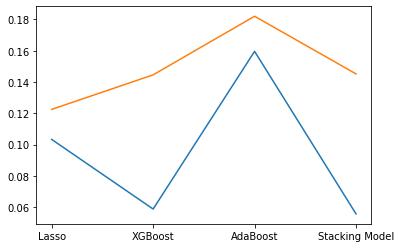

In [32]:
plt.plot(['Lasso','XGBoost','AdaBoost','Stacking Model'],result['In-sample Error'],result['Out-of-sample Error'])